# Sodalake metaproteomics: correlation between MAG abundances
Yihua Liu  
Create: 202306  
Modified from: "C1 vs C5 abundance.R", 20230811  

Description:
A script to explore the correlation of MAG abundances, using samples from N and C together, do stastistical tests, and make plots.


## 1. Set parameters, load data and packages

Load packages

In [1]:
library("stringr")
library("ggplot2")
library("tidyr")
library("dplyr")
library("readr")
library("tibble")
library("RColorBrewer")
library("tidytable")
library("svglite")

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidytable' was built under R version 4.2.3"
This can lead to most dplyr functions being overwritten by tidytable functions.

This can lead to most tidyr functions being overwritten by tidytable functions.


Attaching package: 'tidytable'


The following objects are masked from 'package:tibble':

    enframe, tribble


The following objects are masked from 'package:dplyr':

    across, add_count, add_tally, anti_join, arrange, between,
    bind_cols, bind_rows, c_across, case_match, case_when, coalesce,
    consecutive_id, count, cross_join, cume_dist, cur_column, cur_data,
    cur_group_id, cur_group_rows, dense_rank, desc, disti

Set up parameters

In [ ]:
# set up the working directory
wd = "/yihualiu/mscalisp/"
setwd(wd)
# set up output directory
outroot = str_c(wd, "GEL_MAG_correlation/analysis_", Sys.Date(),"/")
dir.create(outroot, showWarnings = FALSE, recursive = TRUE)
# setup preview format for jupyter notebook data frame
LeyLabRMisc::df.dims()

Warning message:
"replacing previous import 'data.table::last' by 'tidytable::last' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'data.table::fread' by 'tidytable::fread' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'data.table::first' by 'tidytable::first' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'data.table::between' by 'tidytable::between' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'tidytable::fread' by 'data.table::fread' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'tidytable::distinct' by 'dplyr::distinct' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'tidytable::filter' by 'dplyr::filter' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'tidytable::mutate' by 'dplyr::mutate' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'tidytable::pull' by 'dplyr::pull' when loading

Warning message:
"replacing previous import 'tidytable::pivot_longer' by 'tidyr::pivot_longer' when loading 'LeyLabRMisc'"
Warning message:
"replacing previous import 'tidytable::pivot_wider' by 'tidyr::pivot_wider' when loading 'LeyLabRMisc'"


Load data from both N and C datasets, then merge them

In [3]:
data_taxo_C <- read_csv("GEL_C/wrangled_output/calisp_out_unique_peptides_bin_taxo.csv")
unique(data_taxo_C$exp)
print(sprintf("Loaded %d spectra from Carbon and Blank", nrow(data_taxo_C)))
data_taxo_N <- read_csv("GEL_N/wrangled_output/calisp_out_unique_peptides_bin_taxo.csv") %>%
    filter(control == FALSE)
unique(data_taxo_N$exp)
print(sprintf("Loaded %d spectra from N2, Ammo and Urea", nrow(data_taxo_N)))

Rows: 1172590 Columns: 19
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (9): ms_run, bins, proteins, peptide, exp, sample_ID, phylum, short_name...
dbl (8): pattern_total_intensity, ratio_na, ratio_fft, error_fft, delta_na, ...
lgl (2): flag_peptide_assigned_to_multiple_bins, control

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Blank"   "Carbon"  "Initial"

[1] "Loaded 1172590 spectra from Carbon and Blank"


Rows: 1540977 Columns: 19
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (9): ms_run, bins, proteins, peptide, exp, sample_ID, phylum, short_name...
dbl (8): pattern_total_intensity, ratio_na, ratio_fft, error_fft, delta_na, ...
lgl (2): flag_peptide_assigned_to_multiple_bins, control

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Ammo" "N2"   "Urea"

[1] "Loaded 1141098 spectra from N2, Ammo and Urea"


In [4]:
# Merge the two datasets
data_taxo <- rbind(data_taxo_C, data_taxo_N)
unique(data_taxo$exp)
print(sprintf("Now we have %d spectra from all experiments", nrow(data_taxo)))

[1] "Blank"   "Carbon"  "Initial" "Ammo"    "N2"      "Urea"

[1] "Now we have 2313688 spectra from all experiments"


In [ ]:
# Double check if there are leftover spectra that are assigned to multiple bins
unique(data_taxo$flag_peptide_assigned_to_multiple_bins)

[1] FALSE

In [ ]:
data_taxo

ms_run,bins,proteins,peptide,pattern_total_intensity,ratio_na,ratio_fft,error_fft,delta_na,delta_fft,flag_peptide_assigned_to_multiple_bins,exp,time,control,sample_ID,hour,phylum,short_name,taxonomy
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
Run7_EXPA7_B01_1700ng,bin31_GEM2,415729,RTAEESITKR [] [],109753.1,1.129844,1.0529098,0.0014512464,10.57580,-58.23703,FALSE,Blank,0,TRUE,B01,0,Cyanobacteriota,C5,Sodalinema
Run7_EXPA7_B01_1700ng,bin31_GEM2,415729,RTAEESITKR [] [],100390.2,1.053873,0.8016405,0.0006821125,-57.37583,-282.98198,FALSE,Blank,0,TRUE,B01,0,Cyanobacteriota,C5,Sodalinema
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Run7_EXPA7_U71_1700ng,unbinned_PLM2,169331,DMIFEQDPVQILDALLPLYITNQILR [] [],1719978.5,0.35647864,0.54644995,0.001790996,-29.57944,487.5682,FALSE,Urea,7,FALSE,U71,48,unbinned,unbinned,unbinned
Run7_EXPA7_U71_1700ng,bin31_GEM2,158348,LKDFSPSIVILDEADEMLDMGFLDDIEEIFTYLPK [] [],588557.6,0.01672581,0.03404551,0.001213622,-954.46833,-907.3199,FALSE,Urea,7,FALSE,U71,48,Cyanobacteriota,C5,Sodalinema


## 2. Calculate community composition for each sample  
Summarise by spectra counts and pattern intensity of each bin (MAG) in each sample, then calculate the relative abundance of each MAG in each sample.

In [7]:
community_structure = data_taxo %>%
    mutate.(MAG = paste0(short_name,"-", taxonomy)) %>%
    # note that in the next step, we merge all four unbinned "bins" as one unbinned entry, by dropping the "bins" column
    summarise.(spectra_count = n(), sum_pattern_intensity = sum(pattern_total_intensity), .by = c(sample_ID, exp, MAG, time, control, phylum, taxonomy, short_name)) %>%
    arrange.(desc(sum_pattern_intensity)) %>%
    # normalize the spectra count and the sum of pattern intensity among all bins in each sample
    group_by.(sample_ID) %>%
    mutate.(spectra_count_norm = spectra_count/sum(spectra_count), sum_pattern_intensity_norm = sum_pattern_intensity/sum(sum_pattern_intensity)) %>%
    ungroup.() %>%
    arrange.(sample_ID, desc(sum_pattern_intensity_norm)) #%>%
    # mutate.(MAG = factor(MAG, levels = unique(MAG)))
community_structure

Warning message:
"`arrange.()` was deprecated in tidytable v0.10.0.
i Please use `arrange()` instead.
i Please note that all `verb.()` syntax has now been deprecated."


sample_ID,exp,MAG,time,control,phylum,taxonomy,short_name,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
A01,Ammo,C1-Nodosilinea,0,FALSE,Cyanobacteriota,Nodosilinea,C1,9993,105581521791,0.28093899,0.3647878
A01,Ammo,C2-Nodosilinea,0,FALSE,Cyanobacteriota,Nodosilinea,C2,3139,53404131863,0.08824852,0.1845131
...,...,...,...,...,...,...,...,...,...,...,...
U71,Urea,"F1-Bacillus ""AQ""",7,FALSE,Firmicutes,"Bacillus ""AQ""",F1,2,412104.9,1.518960e-05,3.932285e-07
U71,Urea,S6-Spirochaetales,7,FALSE,Spirochaetota,Spirochaetales,S6,1,149872.1,7.594802e-06,1.430073e-07


The abundance table can also be prepared at phylum level. Summarise spectra counts and pattern intensity of each phylum in each sample, then calculate the relative abundance of each phylum in each sample.

In [ ]:
community_structure_phylum <- data_taxo %>%
    # note that we merge all four unbinned "bins" as one unbinned entry, by dropping the "bins" column
    summarise.(spectra_count = n(), sum_pattern_intensity = sum(pattern_total_intensity), .by = c(sample_ID, exp, time, control, phylum)) %>%
    arrange.(desc(sum_pattern_intensity)) %>%
    # normalize the spectra count and the sum of pattern intensity among all phylums in each sample
    group_by.(sample_ID) %>%
    mutate.(spectra_count_norm = spectra_count/sum(spectra_count), sum_pattern_intensity_norm = sum_pattern_intensity/sum(sum_pattern_intensity)) %>%
    ungroup.() %>%
    arrange.(sample_ID, desc(sum_pattern_intensity_norm))
community_structure_phylum

sample_ID,exp,time,control,phylum,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<dbl>,<lgl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
A01,Ammo,0,FALSE,Cyanobacteriota,21405,224286030635,0.6017712,0.7749160
A01,Ammo,0,FALSE,unbinned,11350,51369042033,0.3190891,0.1774818
...,...,...,...,...,...,...,...,...
U71,Urea,7,FALSE,Verrucomicrobiota,5,4266416.5,3.797401e-05,4.070994e-06
U71,Urea,7,FALSE,Firmicutes,2,412104.9,1.518960e-05,3.932285e-07


In [9]:
# save the community structure table
write_csv(community_structure, str_c(outroot, "community_structure.csv"))
write_csv(community_structure_phylum, str_c(outroot, "community_structure_phylum.csv"))

Filter out the unbinned

In [10]:
community_structure_binned = community_structure %>%
    filter.(short_name != "unbinned") 
community_structure_binned
community_structure_binned_phylum = community_structure_phylum %>%
    filter.(phylum != "unbinned")
community_structure_binned_phylum
write_csv(community_structure_binned, str_c(outroot, "community_structure_binned.csv"))
write_csv(community_structure_binned_phylum, str_c(outroot, "community_structure_binned_phylum.csv"))

sample_ID,exp,MAG,time,control,phylum,taxonomy,short_name,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
A01,Ammo,C1-Nodosilinea,0,FALSE,Cyanobacteriota,Nodosilinea,C1,9993,105581521791,0.28093899,0.3647878
A01,Ammo,C2-Nodosilinea,0,FALSE,Cyanobacteriota,Nodosilinea,C2,3139,53404131863,0.08824852,0.1845131
...,...,...,...,...,...,...,...,...,...,...,...
U71,Urea,"F1-Bacillus ""AQ""",7,FALSE,Firmicutes,"Bacillus ""AQ""",F1,2,412104.9,1.518960e-05,3.932285e-07
U71,Urea,S6-Spirochaetales,7,FALSE,Spirochaetota,Spirochaetales,S6,1,149872.1,7.594802e-06,1.430073e-07


sample_ID,exp,time,control,phylum,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<dbl>,<lgl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
A01,Ammo,0,FALSE,Cyanobacteriota,21405,224286030635,0.60177116,0.77491605
A01,Ammo,0,FALSE,Proteobacteria,2171,9917754356,0.06103458,0.03426619
...,...,...,...,...,...,...,...,...
U71,Urea,7,FALSE,Verrucomicrobiota,5,4266416.5,3.797401e-05,4.070994e-06
U71,Urea,7,FALSE,Firmicutes,2,412104.9,1.518960e-05,3.932285e-07


## 3. Test the correlation of abundance between every two MAGs

Now we can make a data matrix of MAGs and samples, with each cell being the relative abundance of a MAG in a sample. We can use this matrix to test the correlation of abundance between every two MAGs. To address the impact of labeling experiment, we can do this for controled vs experiment, and among all experiemnt datasets, and then compare the correlation coefficients between the datasets.  

Load data if starting from this step

In [11]:
community_structure = read_csv(str_c(outroot, "community_structure.csv"))
community_structure_binned = read_csv(str_c(outroot, "community_structure_binned.csv"))

Rows: 1558 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): sample_ID, exp, MAG, phylum, taxonomy, short_name
dbl (5): time, spectra_count, sum_pattern_intensity, spectra_count_norm, sum...
lgl (1): control

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1523 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): sample_ID, exp, MAG, phylum, taxonomy, short_name
dbl (5): time, spectra_count, sum_pattern_intensity, spectra_count_norm, sum...
lgl (1): control

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 3.1. Preapre functions 
#### Function to generate data matrix from the dataframe  
The function include follow inputs beside the dataframe:  
1. top_n: The number of top abundant MAGs to be included in the matrix
2. abundance_from: Whether to use spectra counts or pattern intensity calculated relative abundance
3. exp_list: A list of experiment groups to be included in the matrix  

Note: The correlation matrix will only include the MAGs that are present in all the samples of the experiment groups, or top_n MAGs, whichever is smaller.  
Here we present the correlation matrix also in long format to include more information and enable ggplot2 ploting.

In [12]:
# # test scripts for the function
# top_n = 20
# abundance_from = "sum_pattern_intensity_norm"
# exp_list = c("Carbon", "N2", "Ammo", "Urea")
# df = community_structure_binned
# # 'Blank''Carbon''Initial''Ammo''N2''Urea'

correlation_mtx <- function(df, abundance_from = "sum_pattern_intensity_norm", exp_list = c("Carbon", "N2", "Ammo", "Urea", "Blank",'Initial'), top_n = NA){
    # remove bins that does not exist in all samples in df
    df <- df %>%
        filter.(exp %in% exp_list) %>%
        filter.(n() == length(unique(sample_ID)), .by = MAG) %>%
        select.(MAG, abundance = all_of(abundance_from), sample_ID)
    
    top_n <- ifelse(is.na(top_n), nrow(df), top_n)

    # get the top bins
    topbins = df %>%
        group_by.(MAG) %>%
        summarise.(abundance = sum(abundance)) %>% 
        arrange.(desc(abundance)) %>%
        slice.(1:top_n) %>%
        ungroup.() %>%
        pull.(MAG)
        
    # get the abundance matrix
    abundance_matrix = df %>%
        filter.(MAG %in% topbins) %>%
        pivot_wider.(names_from = MAG, values_from = abundance) %>%
        column_to_rownames(var = "sample_ID") %>%
        # remove columns containing NAs
        select_if(~all(!is.na(.))) %>%
        as.matrix()
    
    # # calculate the correlation matrix   
    # # This works if we do not need to know p-values
    # cor_matrix <- cor(abundance_matrix, method = "pearson")
    
    # calculate correlation coefficient and p-value for each pair of bins
        # initialize the correlation matrix and p-value matrix
        cor_matrix <- matrix(NA, nrow = ncol(abundance_matrix), ncol = ncol(abundance_matrix))
        p_values <- matrix(NA, nrow = ncol(abundance_matrix), ncol = ncol(abundance_matrix))
        test_method <- matrix(NA, nrow = ncol(abundance_matrix), ncol = ncol(abundance_matrix))
        
        # add col and row names
        colnames(cor_matrix) <- rownames(cor_matrix) <- colnames(p_values) <- rownames(p_values) <- colnames(test_method) <- rownames(test_method) <- colnames(abundance_matrix)
        
        # create a function to test for normality
        # To determine whether to use Pearson's correlation (for normally distributed data) or 
        # Spearman's correlation (for non-normally distributed data)
        is_normal <- function(x){
                return(shapiro.test(x)$p.value >= 0.05)
                }
        
        # loop to calculate correlation coefficient and p-value for each pair of bins
        for (i in 1:ncol(abundance_matrix)){
            for (j in 1:ncol(abundance_matrix)){
                x <- abundance_matrix[, i]
                y <- abundance_matrix[, j]
                # if (i == j){
                #     cor_matrix[i,j] <- 1
                #     p_values[i,j] <- 0
                # } else {
                    if(is_normal(x) && is_normal(y)){
                        cor_result <- cor.test(x, y, method = "pearson")
                        test_method[i,j] <- "Pearson"
                    } else {
                        cor_result <- cor.test(x, y, method = "spearman")
                        test_method[i,j] <- "Spearman"
                    }
                    cor_matrix[i,j] <- cor_result$estimate
                    p_values[i,j] <- cor_result$p.value
                # }
            }
        }

    # Combine correlation matrix and p-values into a long-format data frame
    p_values_df <- as.data.frame(p_values) %>%
        rownames_to_column(var = "MAG1") %>%
        gather(MAG2, p_value, -MAG1) 
    
    test_method_df <- as.data.frame(test_method) %>%
        rownames_to_column(var = "MAG1") %>%
        gather(MAG2, test_method, -MAG1)
    
    result_df <- cor_matrix %>%
        as.data.frame() %>%
        rownames_to_column(var = "MAG1") %>%
        gather(MAG2, correlation, -MAG1) %>%
        left_join.(p_values_df, by = c("MAG1", "MAG2")) %>%
        left_join.(test_method_df, by = c("MAG1", "MAG2"))
         
        # mutate.(p_value = p_values) #%>%
        # mutate.(correlation = as.numeric(correlation), p_value = as.numeric(p_value)) %>%
        # arrange.(desc(correlation))

    # result_df
    return(result_df)
}

#### Function to add phylum information to the correlation table
Now we also want to include phylum data in the datatable, so we can later group by phylum when making plots.  
Here is a function to extract phylum-MAG relationship from the community_structure_binned table,
 then add it to the correlation table.


In [13]:
# # function test
# data <- result_df
# ref <- community_structure_binned

phylum_add <- function(df, ref = community_structure_binned){
    # build the phylum-MAG reference table
    ref_df <- ref %>%
        select.(MAG, phylum) %>%
        unique()

    df <- df %>%
        left_join.(ref_df, by = c("MAG1" = "MAG")) 
    return(df)
}

#### Function for heatmap plot
A function to make heatmap plot using ggplot2.  
Choice the shape of the plot from:  
- F: full matrix
- T: lower triangle  
- D: full matrix excpet the diagonal
- TD: lower triangle without diagonal  

Text labeling for plot title and axis can be added
- tit: title, e.g. "Correlation of top abundant MAGs across all samples"
- cap: caption, e.g. "weighted by normalised spectra count"

In [14]:
# testing inputs
# df = cor_mtx_all_PI
# plot_shape = "TD"
# tit = "Correlation of top abundant MAGs"
# cap = ""
ggheat <- function(df, plot_shape = "F", tit = "Correlation of top abundant MAGs", 
                   cap = "", x_angle = 0, x_hjust =0) {

    if (plot_shape == "D") {
       data = subset(df, MAG1 != MAG2)
    } else { if(plot_shape == "T"){
        data = subset(df, MAG1 >= MAG2)
    } else { if (plot_shape == "TD") {
        data = subset(df, MAG1 > MAG2)
    } else {
        data = df
    }}}

    heatmap_plot <- data %>%
    ggplot(aes(MAG1, MAG2, fill = correlation))+
    geom_tile() +
    scale_fill_distiller(palette = "Spectral") +
    # Add significance indicators to the heatmap
    geom_text(aes(label = ifelse(p_value < 0.05, "**", ifelse(p_value < 0.5, "*", ""))),
                color = "white", size = 4)+
    # # Alternative to ploting only the lower triangle, we can also cover the upper triangle of the correlation matrix
    # geom_tile(data = subset(cor_mtx_all_PI, MAG1 <= MAG2), fill = "white", alpha = 1)+
    labs(title = tit, x = "", y = "",
        subtitle = "Significance: * p value < 0.5, ** p value < 0.05",
        caption = cap) +
    # simplify the x axis labels by keeping only the bin number (e.g. keep "C1" from "C1-Nodosilinea")
    scale_x_discrete(limits = rev(levels(as.factor((data$MAG1)))), 
                     labels = function(x) str_remove(x, "-.*")) +
    # bring y axis to the right
    # scale_y_discrete(position = "right") +
    theme_minimal() +
    theme(axis.text.x = element_text(color = data$Phylum.x, size = 12, angle = x_angle, hjust = x_hjust),
            axis.text.y = element_text(color = data$Phylum.y, size = 12),
            plot.title = element_text(size = 18),
            plot.title.position = "plot",
            plot.subtitle = element_text(size = 12),
            plot.caption = element_text(size = 10),
            plot.caption.position = "plot",
            legend.key.size = unit(1, "cm"),
            # remove grid lines
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            # remove axis ticks
            axis.ticks = element_blank())

    # bring the legend to the inside right if only plotting lower triangle
    if(plot_shape %in% c("T", "TD")){
        heatmap_plot <- heatmap_plot + 
            theme(legend.justification = c(1, 1), legend.position = c(1, 1),
            legend.text = element_text(size = 12),
            legend.title = element_text(size = 14))
    }
    heatmap_plot
}

### 3.2. Generate correlation matrix and heatmaps for all experiment groups
Let's first look at the correlation of every two MAGs, from all experiment groups.

In [15]:
dir.create(str_c(outroot,"all_samples"))

**a) Using summed pattern intensity as abundance**

In [16]:
cor_mtx_all_PI <- correlation_mtx(community_structure_binned, abundance_from = "sum_pattern_intensity_norm") %>%
    phylum_add()
cor_mtx_all_PI

MAG1,MAG2,correlation,p_value,test_method,phylum
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
C1-Nodosilinea,C1-Nodosilinea,1.0000000,0.0000000000,Spearman,Cyanobacteriota
C2-Nodosilinea,C1-Nodosilinea,0.5630252,0.0005342031,Spearman,Cyanobacteriota
...,...,...,...,...,...
C7-Cyanobium,D1-Desulfonatronum,0.02156863,0.9022192,Spearman,Cyanobacteriota
D1-Desulfonatronum,D1-Desulfonatronum,1.00000000,0.0000000,Spearman,Desulfobacterota


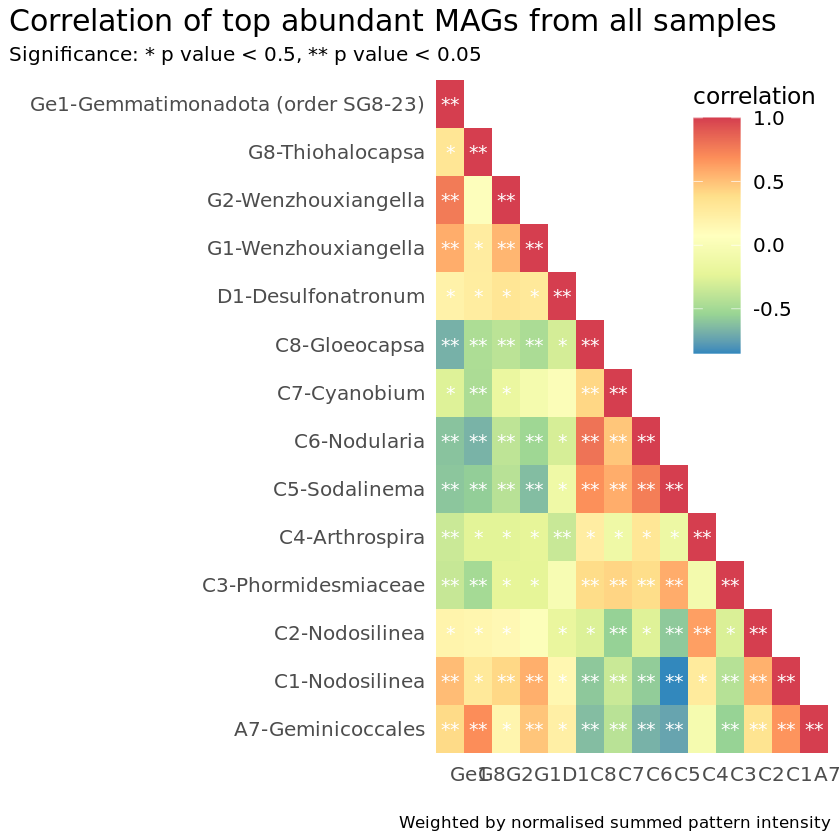

In [17]:
ggheat(cor_mtx_all_PI, plot_shape = "T", tit = "Correlation of top abundant MAGs from all samples", 
                   cap = "Weighted by normalised summed pattern intensity")

# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

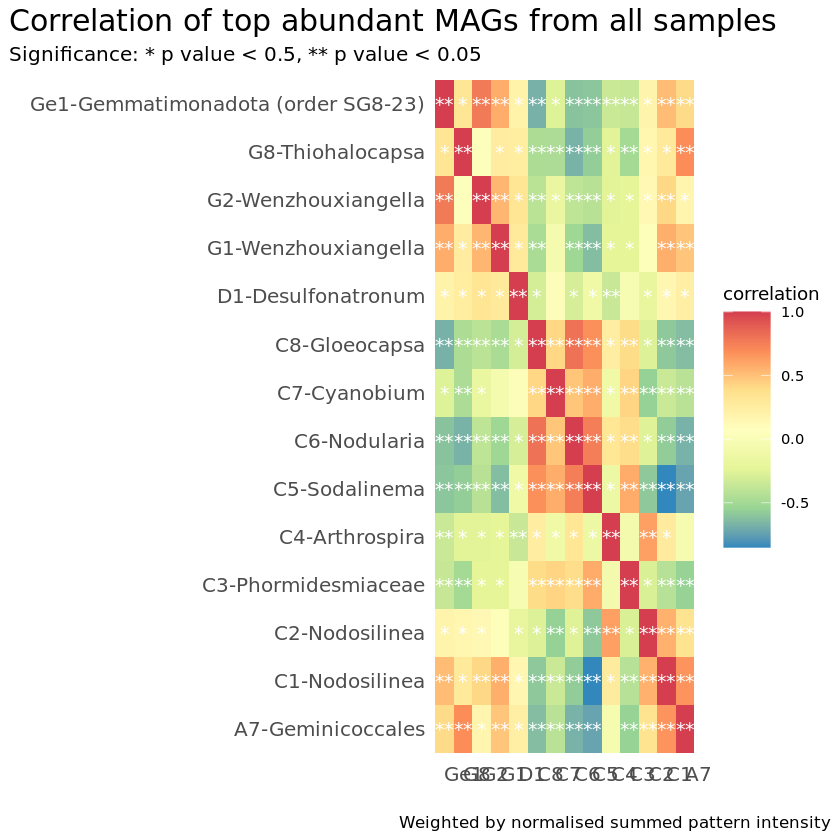

In [18]:
# Alternative format, full matrix
ggheat(cor_mtx_all_PI, plot_shape = "F", tit = "Correlation of top abundant MAGs from all samples", 
                   cap = "Weighted by normalised summed pattern intensity")
# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity_F.png"), plot = last_plot(), width = 11, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity_F.svg"), plot = last_plot(), width = 11, height = 8, units = "in", device = "svg")

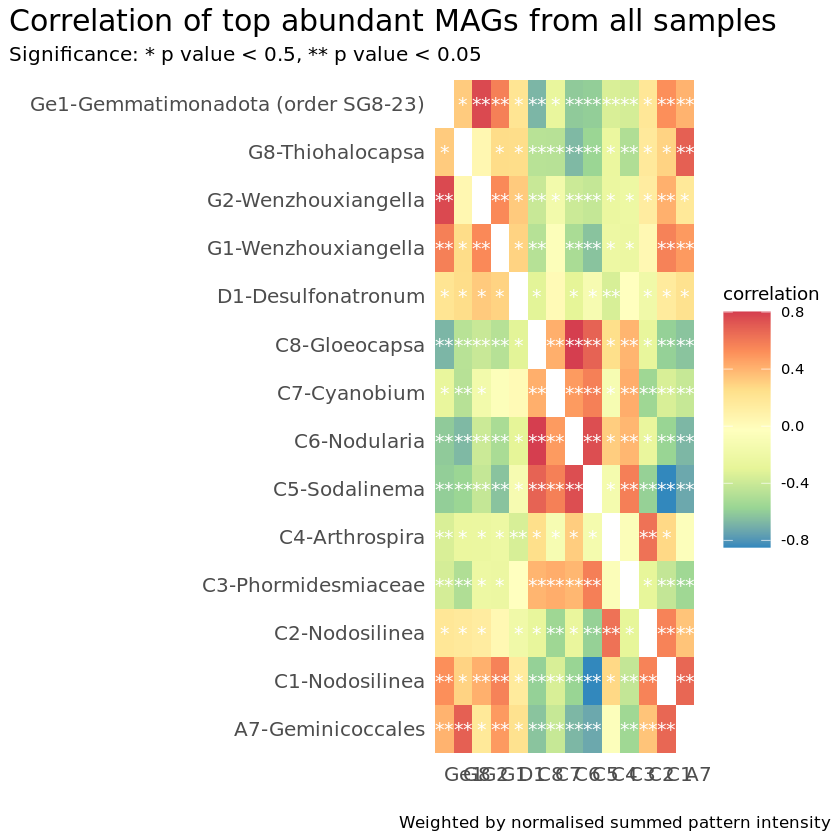

In [19]:
# Alternative format, full mat without diagonal
ggheat(cor_mtx_all_PI, plot_shape = "D", tit = "Correlation of top abundant MAGs from all samples", 
                   cap = "Weighted by normalised summed pattern intensity")
# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity_D.png"), plot = last_plot(), width = 11, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity_D.svg"), plot = last_plot(), width = 11, height = 8, units = "in", device = "svg")

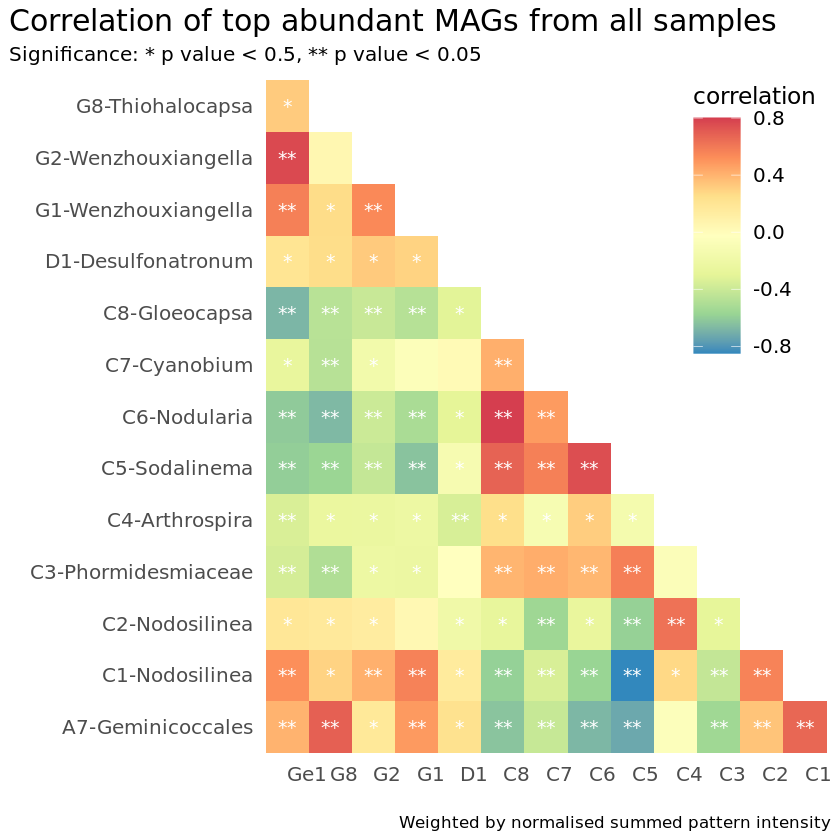

In [20]:
# Alternative format, lower triangle without diagonal
ggheat(cor_mtx_all_PI, plot_shape = "TD", tit = "Correlation of top abundant MAGs from all samples", 
                   cap = "Weighted by normalised summed pattern intensity")
# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity_TD.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_w-Intensity_TD.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

For only phylum Cyanobacteriota

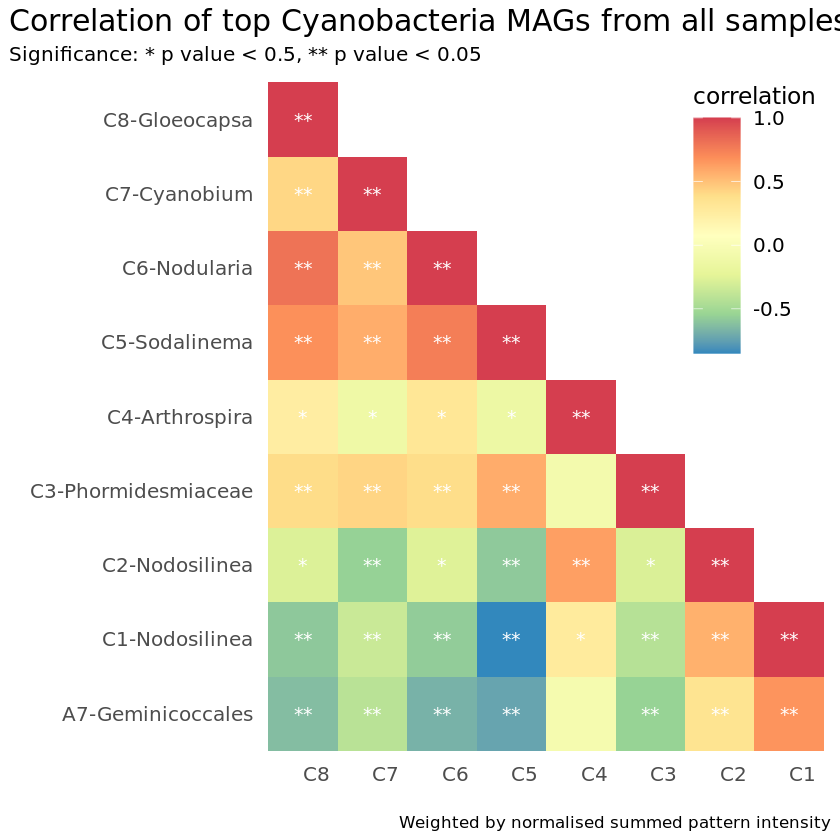

In [21]:
cor_mtx_all_PI %>%
    filter.(phylum == "Cyanobacteriota") %>%
ggheat(., plot_shape = "T", tit = "Correlation of top Cyanobacteria MAGs from all samples", 
                   cap = "Weighted by normalised summed pattern intensity")
ggsave(str_c(outroot,"all_samples/heatmap_Cyano_w-Intensity_T.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_Cyano_w-Intensity_T.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

**b) using spectra count as abundance**

In [22]:
cor_mtx_all_SC <- correlation_mtx(community_structure_binned, abundance_from = "spectra_count_norm")

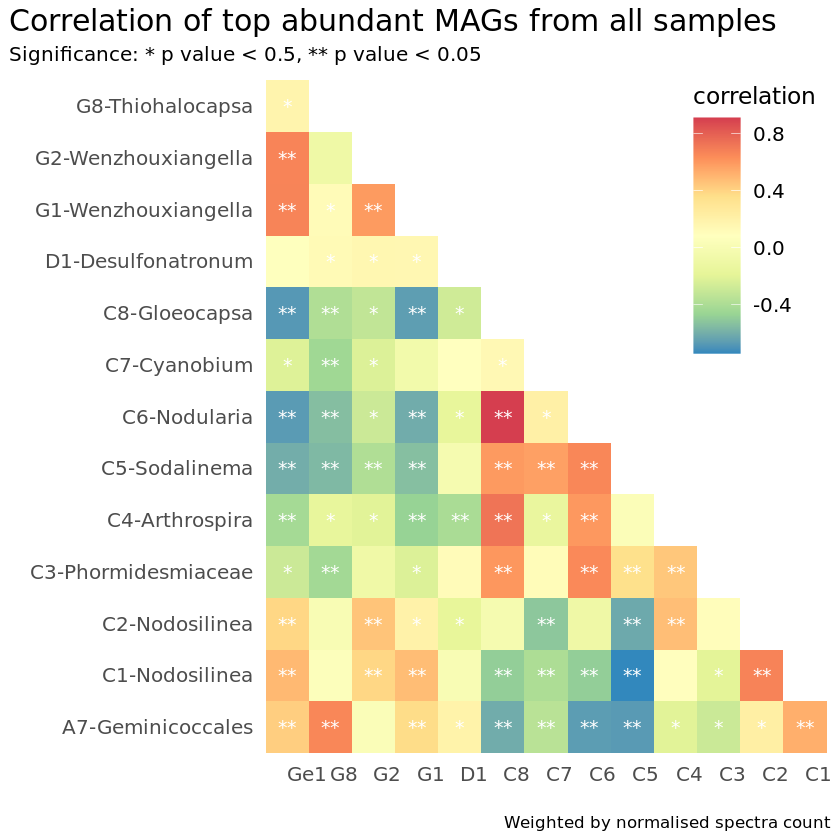

In [23]:
ggheat(cor_mtx_all_SC, plot_shape = "TD", tit = "Correlation of top abundant MAGs from all samples", 
                   cap = "Weighted by normalised spectra count")
# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_w-Count_TD.png"), plot = last_plot(), width = 10, height = 9, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_w-Count_TD.svg"), plot = last_plot(), width = 10, height = 9, units = "in", device = "svg")

### 3.3. Generate correlation matrix and heatmaps for all blank groups
Let's now look at the correlation of every two MAGs in all blank samples

**a) Using summed pattern intensity as abundance**

In [24]:
dir.create(str_c(outroot,"blanks"))

In [25]:
cor_mtx_blk_PI <- correlation_mtx(community_structure_binned, abundance_from = "sum_pattern_intensity_norm",
                    exp_list = c("Blank","Initial")) %>%
    phylum_add()
cor_mtx_blk_PI

MAG1,MAG2,correlation,p_value,test_method,phylum
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
C5-Sodalinema,C5-Sodalinema,1.0000000,0.00000000,Pearson,Cyanobacteriota
G8-Thiohalocapsa,C5-Sodalinema,-0.5811494,0.07807809,Pearson,Proteobacteria
...,...,...,...,...,...
G4-Thioalkalivibrionaceae,G5-Thioalkalivibrionaceae,0.7818182,0.01165127,Spearman,Proteobacteria
G5-Thioalkalivibrionaceae,G5-Thioalkalivibrionaceae,1.0000000,0.00000000,Spearman,Proteobacteria


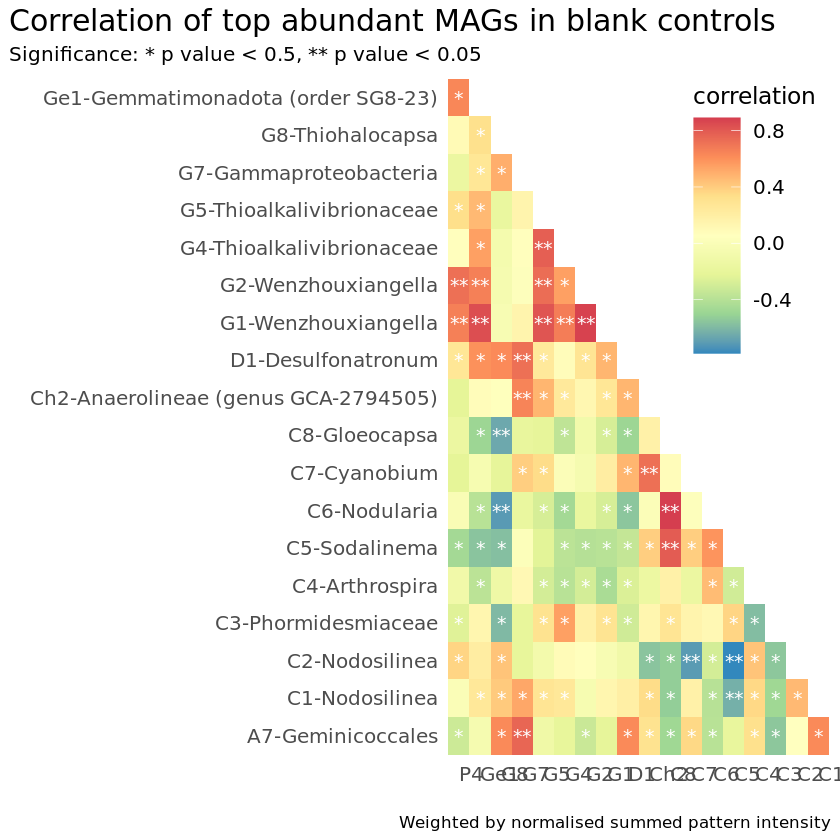

In [26]:
# lower triangle without diagonal
ggheat(cor_mtx_blk_PI, plot_shape = "TD", tit = "Correlation of top abundant MAGs in blank controls", 
                   cap = "Weighted by normalised summed pattern intensity")
# save the plot
ggsave(str_c(outroot,"blanks/heatmap_w-Intensity_TD.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"blanks/heatmap_w-Intensity_TD.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

**b) using spectra count as abundance**

In [27]:
cor_mtx_blk_SC <- correlation_mtx(community_structure_binned, abundance_from = "spectra_count_norm",
                    exp_list = c("Blank","Initial")) %>%
    phylum_add()
head(cor_mtx_blk_SC)

MAG1,MAG2,correlation,p_value,test_method,phylum
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
C5-Sodalinema,C5-Sodalinema,1.0000000,0.00000000,Pearson,Cyanobacteriota
G8-Thiohalocapsa,C5-Sodalinema,-0.6173298,0.05722877,Pearson,Proteobacteria
...,...,...,...,...,...
C4-Arthrospira,C5-Sodalinema,-0.03030303,0.9457098,Spearman,Cyanobacteriota
C6-Nodularia,C5-Sodalinema,0.53939394,0.1132981,Spearman,Cyanobacteriota


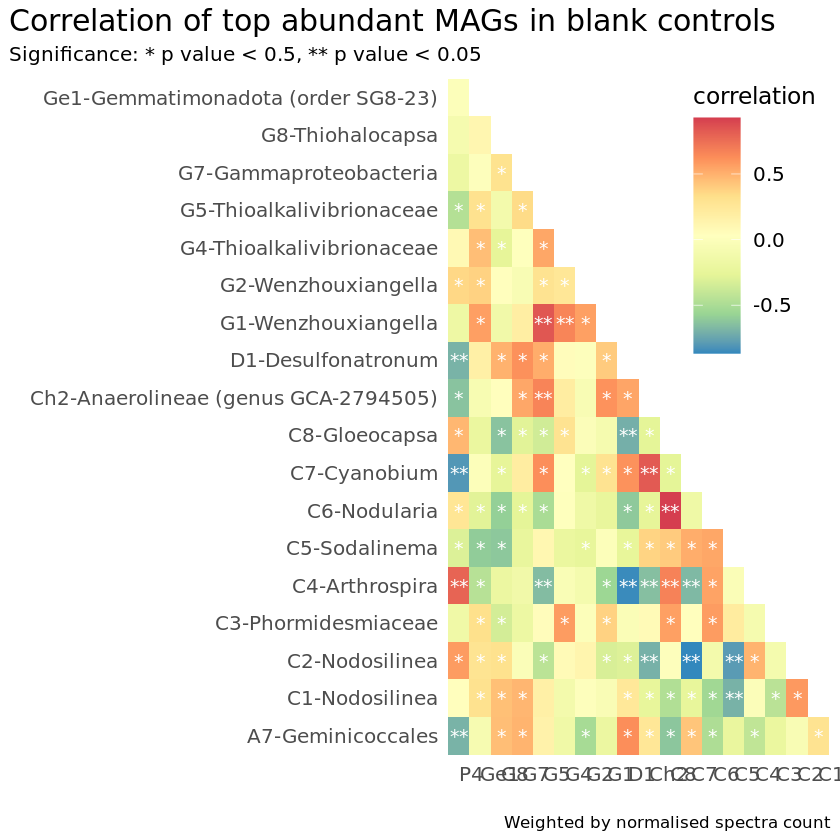

In [28]:
# lower triangle without diagonal
ggheat(cor_mtx_blk_SC, plot_shape = "TD", tit = "Correlation of top abundant MAGs in blank controls", 
                   cap = "Weighted by normalised spectra count")

# save the plot
ggsave(str_c(outroot,"blanks/heatmap_w-Count_TD.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"blanks/heatmap_w-Count_TD.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

### 3.4 For all carbon  
Here we look at the correlation of every two MAGs in all blank samples

**a) Using summed pattern intensity as abundance**

In [29]:
cor_mtx_C_PI <- correlation_mtx(community_structure_binned, abundance_from = "sum_pattern_intensity_norm",
                    exp_list = c("Blank","Initial"))
head(cor_mtx_C_PI)

MAG1,MAG2,correlation,p_value,test_method
<chr>,<chr>,<dbl>,<dbl>,<chr>
C5-Sodalinema,C5-Sodalinema,1.0000000,0.00000000,Pearson
G8-Thiohalocapsa,C5-Sodalinema,-0.5811494,0.07807809,Pearson
...,...,...,...,...
C4-Arthrospira,C5-Sodalinema,-0.3065331,0.38899197,Pearson
C6-Nodularia,C5-Sodalinema,0.5888991,0.07325392,Pearson


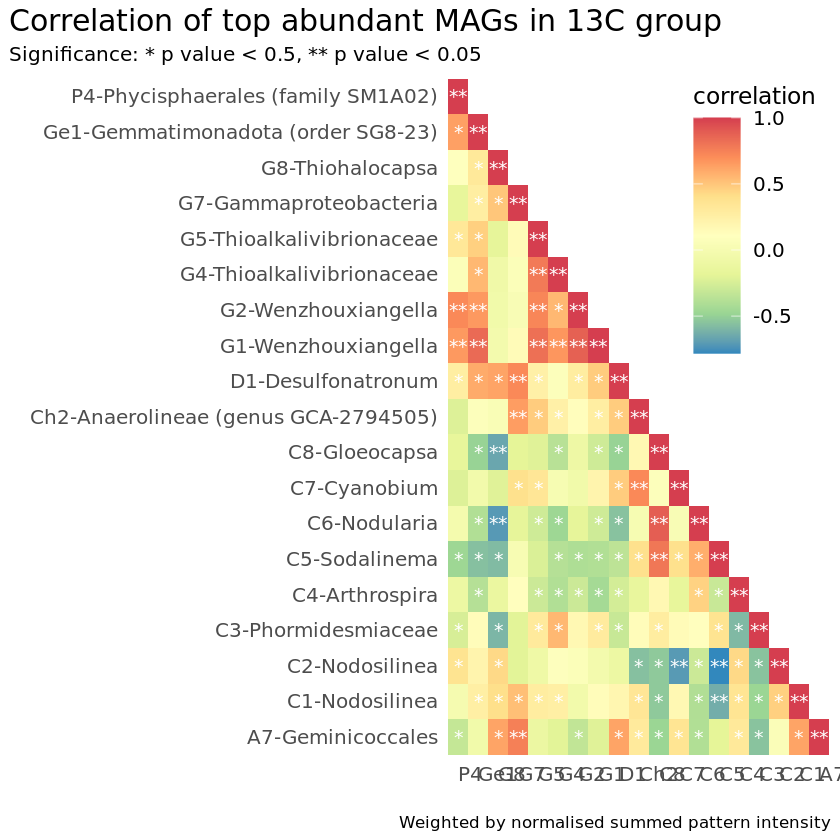

In [30]:
# lower triangle with diagonal
ggheat(cor_mtx_C_PI, plot_shape = "T", tit = "Correlation of top abundant MAGs in 13C group", 
                   cap = "Weighted by normalised summed pattern intensity")
# save the plot
ggsave(str_c(outroot,"carbon/heatmap_w-Intensity_T.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"carbon/heatmap_w-Intensity_T.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

**b) using spectra count as abundance**


In [31]:
cor_mtx_C_SC <- correlation_mtx(community_structure_binned, abundance_from = "spectra_count_norm",
                    exp_list = c("Carbon")) %>%
    phylum_add()
cor_mtx_C_SC

MAG1,MAG2,correlation,p_value,test_method,phylum
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
C1-Nodosilinea,C1-Nodosilinea,1.0000000,0.0000000,Pearson,Cyanobacteriota
G8-Thiohalocapsa,C1-Nodosilinea,0.1103193,0.7948234,Pearson,Proteobacteria
...,...,...,...,...,...
C9-Spirulina,G5-Thioalkalivibrionaceae,-0.007742356,0.9854837,Pearson,Cyanobacteriota
G5-Thioalkalivibrionaceae,G5-Thioalkalivibrionaceae,1.000000000,0.0000000,Pearson,Proteobacteria


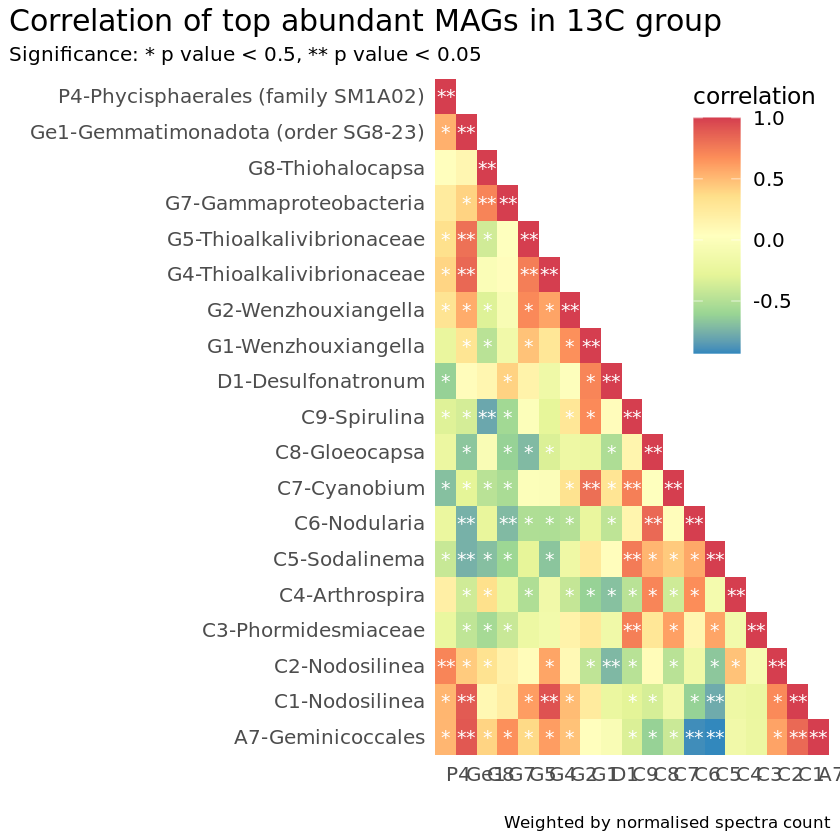

In [32]:
# lower triangle with diagonal
ggheat(cor_mtx_C_SC, plot_shape = "T", tit = "Correlation of top abundant MAGs in 13C group", 
                   cap = "Weighted by normalised spectra count")
# save the plot
ggsave(str_c(outroot,"carbon/heatmap_w-Count_T.png"), plot = last_plot(), width = 10, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"carbon/heatmap_w-Count_T.svg"), plot = last_plot(), width = 10, height = 8, units = "in", device = "svg")

## 4. Test the correlation of abundance between every two phylums
Load data if starting from this step.  
Here I assign the phylum column as "MAG" to be able to work without changing the functions.

In [33]:
community_structure_phylum = read_csv(str_c(outroot, "community_structure_phylum.csv"))
community_structure_binned_phylum = read_csv(str_c(outroot, "community_structure_binned_phylum.csv"))
community_structure_phylum
community_structure_binned_phylum

Rows: 420 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): sample_ID, exp, phylum
dbl (5): time, spectra_count, sum_pattern_intensity, spectra_count_norm, sum...
lgl (1): control

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 385 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): sample_ID, exp, phylum
dbl (5): time, spectra_count, sum_pattern_intensity, spectra_count_norm, sum...
lgl (1): control

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


sample_ID,exp,time,control,phylum,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A01,Ammo,0,FALSE,Cyanobacteriota,21405,224286030635,0.6017712,0.7749160
A01,Ammo,0,FALSE,unbinned,11350,51369042033,0.3190891,0.1774818
...,...,...,...,...,...,...,...,...
U71,Urea,7,FALSE,Verrucomicrobiota,5,4266416.5,3.797401e-05,4.070994e-06
U71,Urea,7,FALSE,Firmicutes,2,412104.9,1.518960e-05,3.932285e-07


sample_ID,exp,time,control,phylum,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A01,Ammo,0,FALSE,Cyanobacteriota,21405,224286030635,0.60177116,0.77491605
A01,Ammo,0,FALSE,Proteobacteria,2171,9917754356,0.06103458,0.03426619
...,...,...,...,...,...,...,...,...
U71,Urea,7,FALSE,Verrucomicrobiota,5,4266416.5,3.797401e-05,4.070994e-06
U71,Urea,7,FALSE,Firmicutes,2,412104.9,1.518960e-05,3.932285e-07


In [35]:
# Assign the phylum column as "MAG" to be able to work without changing the functions.
community_structure_phylum = community_structure_phylum %>%
    rename.(MAG = phylum)
community_structure_phylum
community_structure_binned_phylum = community_structure_binned_phylum %>%
    rename.(MAG = phylum)
community_structure_binned_phylum

sample_ID,exp,time,control,MAG,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A01,Ammo,0,FALSE,Cyanobacteriota,21405,224286030635,0.6017712,0.7749160
A01,Ammo,0,FALSE,unbinned,11350,51369042033,0.3190891,0.1774818
...,...,...,...,...,...,...,...,...
U71,Urea,7,FALSE,Verrucomicrobiota,5,4266416.5,3.797401e-05,4.070994e-06
U71,Urea,7,FALSE,Firmicutes,2,412104.9,1.518960e-05,3.932285e-07


sample_ID,exp,time,control,MAG,spectra_count,sum_pattern_intensity,spectra_count_norm,sum_pattern_intensity_norm
<chr>,<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A01,Ammo,0,FALSE,Cyanobacteriota,21405,224286030635,0.60177116,0.77491605
A01,Ammo,0,FALSE,Proteobacteria,2171,9917754356,0.06103458,0.03426619
...,...,...,...,...,...,...,...,...
U71,Urea,7,FALSE,Verrucomicrobiota,5,4266416.5,3.797401e-05,4.070994e-06
U71,Urea,7,FALSE,Firmicutes,2,412104.9,1.518960e-05,3.932285e-07


### 4.1. Generate correlation matrix and heatmaps for all experiment groups
Let's first look at the correlation of every two phylums, from all experiment groups.  
**a) Using summed pattern intensity as abundance**

In [36]:
cor_mtx_all_phy_PI <- correlation_mtx(community_structure_binned_phylum, abundance_from = "sum_pattern_intensity_norm")
cor_mtx_all_phy_PI

MAG1,MAG2,correlation,p_value,test_method
<chr>,<chr>,<dbl>,<dbl>,<chr>
Cyanobacteriota,Cyanobacteriota,1.0000000,6.647405e-255,Pearson
Proteobacteria,Cyanobacteriota,-0.8478992,8.229506e-08,Spearman
...,...,...,...,...
Gemmatimonadota,Desulfobacterota,0.2137255,0.2168093,Spearman
Desulfobacterota,Desulfobacterota,1.0000000,0.0000000,Spearman


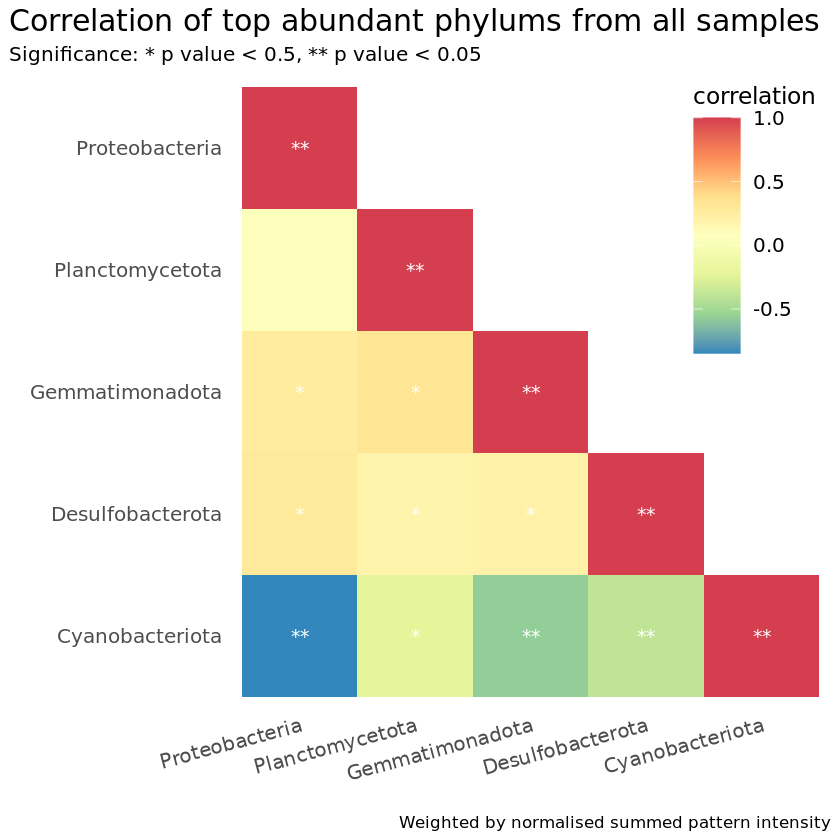

In [37]:
ggheat(cor_mtx_all_phy_PI, plot_shape = "T", tit = "Correlation of top abundant phylums from all samples", 
                   cap = "Weighted by normalised summed pattern intensity", x_angle = 15, x_hjust = 1) 

# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_phylum_w-Intensity_T.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_phylum_w-Intensity_T.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")

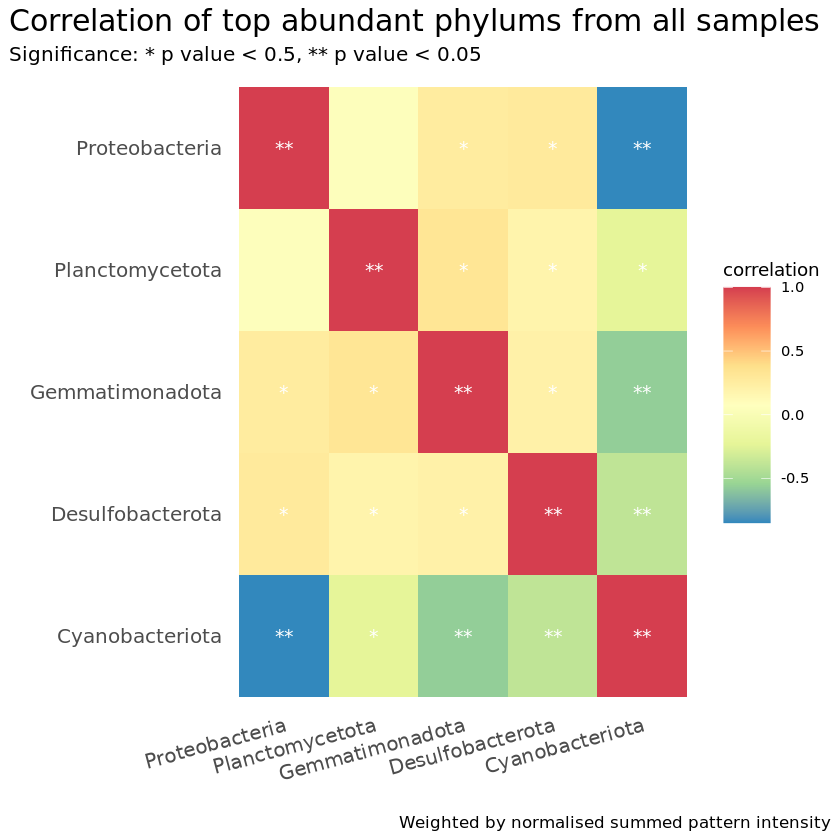

In [38]:
ggheat(cor_mtx_all_phy_PI, tit = "Correlation of top abundant phylums from all samples", 
                   cap = "Weighted by normalised summed pattern intensity", x_angle = 15, x_hjust = 1) 

# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_phylum_w-Intensity.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_phylum_w-Intensity.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")

**b) using spectra count as abundance**

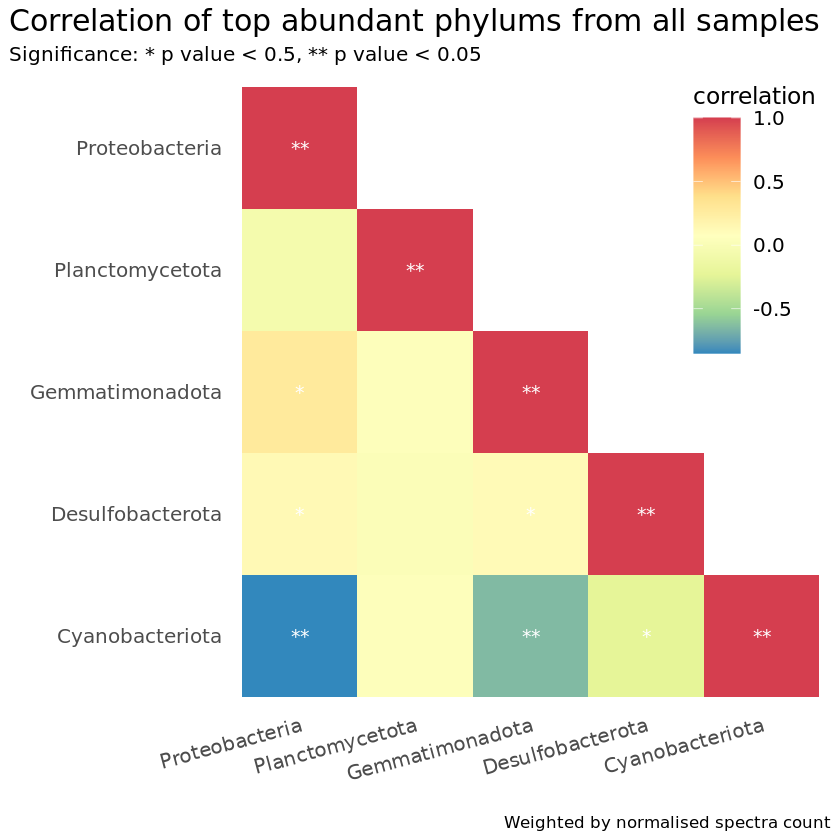

In [39]:
cor_mtx_all_phy_SC <- correlation_mtx(community_structure_binned_phylum, abundance_from = "spectra_count_norm")
ggheat(cor_mtx_all_phy_SC, plot_shape = "T", tit = "Correlation of top abundant phylums from all samples", 
                   cap = "Weighted by normalised spectra count", x_angle = 15, x_hjust = 1)
# save the plot
ggsave(str_c(outroot,"all_samples/heatmap_phylum_w-Count_T.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"all_samples/heatmap_phylum_w-Count_T.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")

### 4.2. Generate correlation matrix and heatmaps for all blank groups
Let's now look at the correlation of every two phylums in all blank samples  

In [40]:
cor_mtx_blk_phy_PI <- correlation_mtx(community_structure_binned_phylum, abundance_from = "sum_pattern_intensity_norm", exp_list = c("Blank", "Initial"))
cor_mtx_blk_phy_SC <- correlation_mtx(community_structure_binned_phylum, abundance_from = "spectra_count_norm", exp_list =  c("Blank","Initial"))
cor_mtx_all_phy_PI
cor_mtx_all_phy_SC

MAG1,MAG2,correlation,p_value,test_method
<chr>,<chr>,<dbl>,<dbl>,<chr>
Cyanobacteriota,Cyanobacteriota,1.0000000,6.647405e-255,Pearson
Proteobacteria,Cyanobacteriota,-0.8478992,8.229506e-08,Spearman
...,...,...,...,...
Gemmatimonadota,Desulfobacterota,0.2137255,0.2168093,Spearman
Desulfobacterota,Desulfobacterota,1.0000000,0.0000000,Spearman


MAG1,MAG2,correlation,p_value,test_method
<chr>,<chr>,<dbl>,<dbl>,<chr>
Cyanobacteriota,Cyanobacteriota,1.000000,0.00000e+00,Pearson
Proteobacteria,Cyanobacteriota,-0.849889,1.05703e-10,Pearson
...,...,...,...,...
Gemmatimonadota,Desulfobacterota,0.1232493,0.4790909,Spearman
Desulfobacterota,Desulfobacterota,1.0000000,0.0000000,Spearman


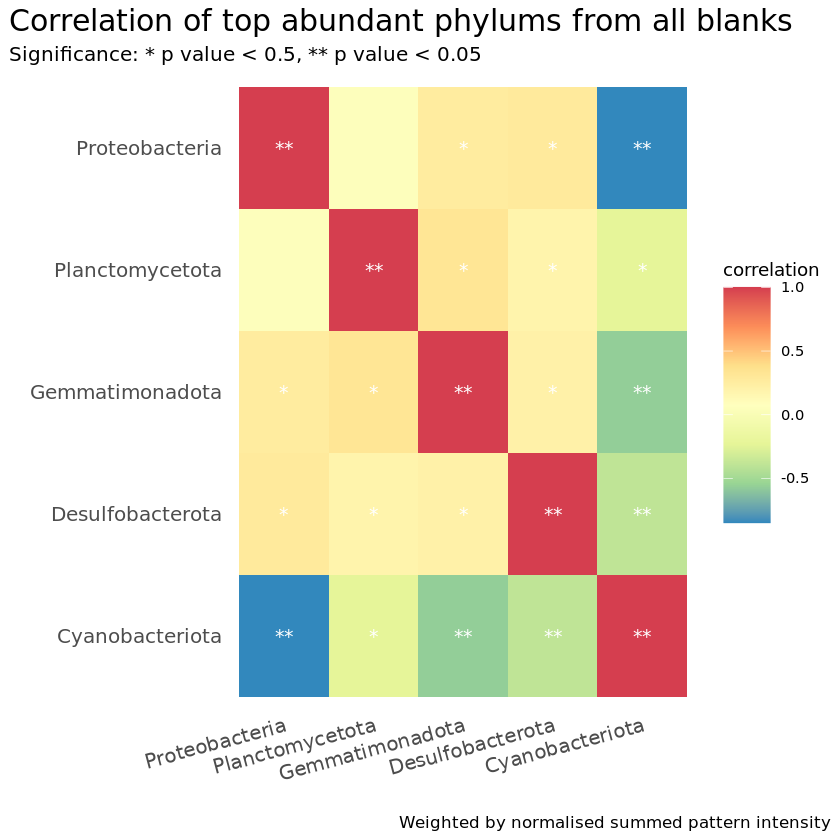

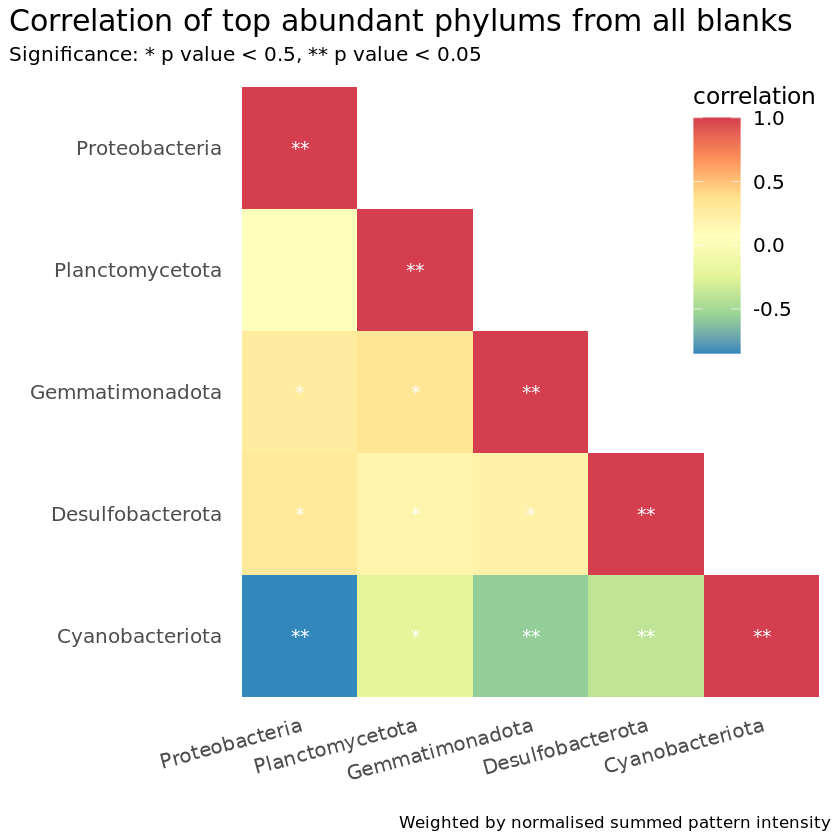

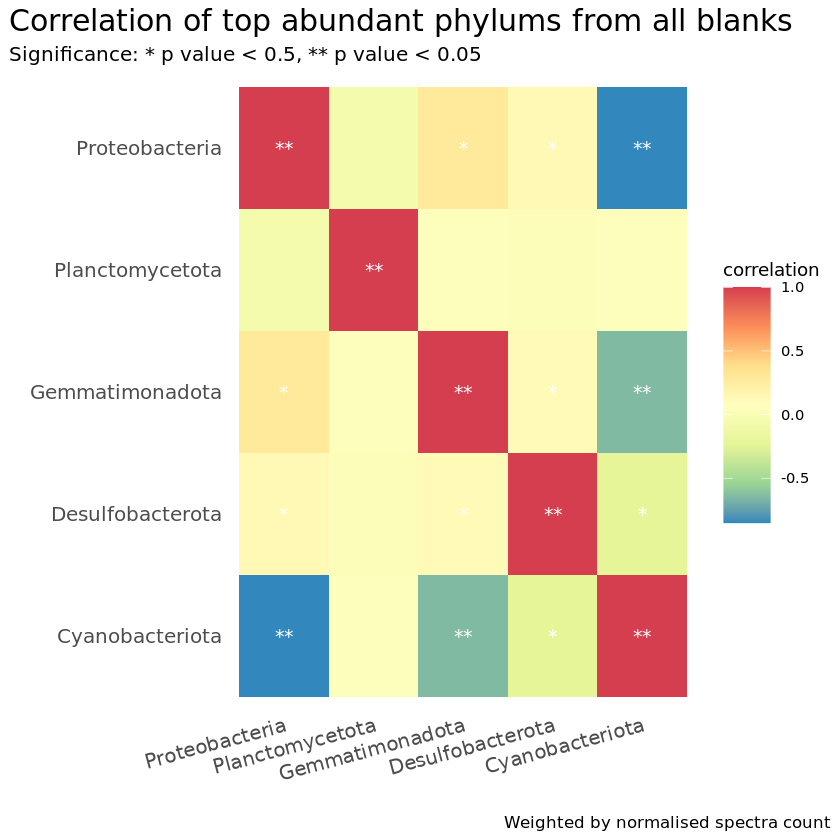

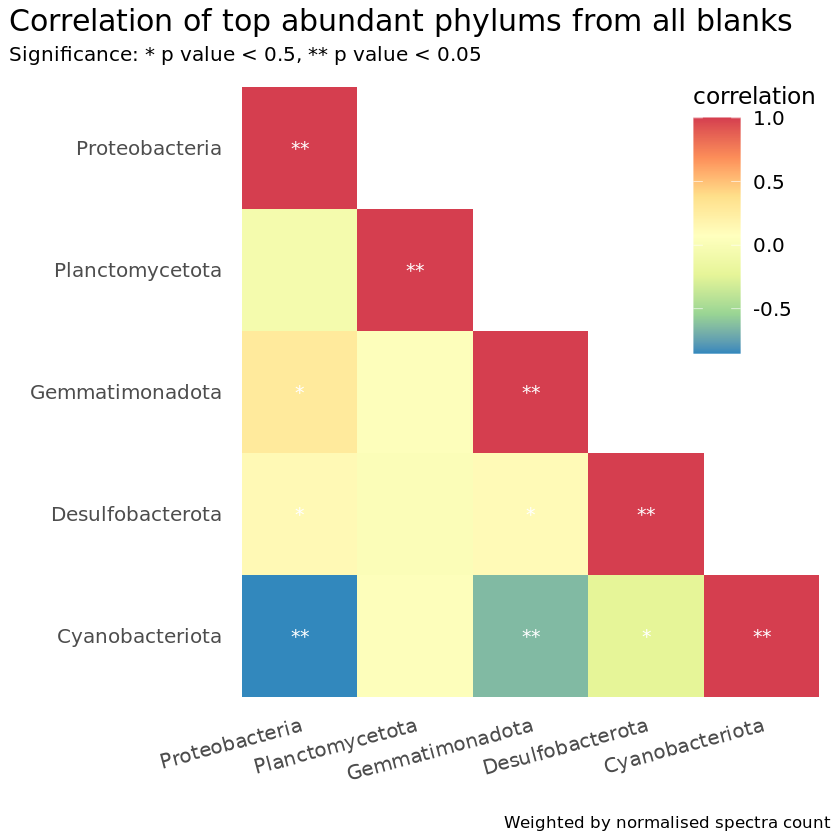

In [41]:
# Full, w PI
ggheat(cor_mtx_all_phy_PI, tit = "Correlation of top abundant phylums from all blanks", 
                   cap = "Weighted by normalised summed pattern intensity", x_angle = 15, x_hjust = 1) 
# save the plot
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Intensity.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Intensity.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")

# Tri, w PI
ggheat(cor_mtx_all_phy_PI, plot_shape = "T", tit = "Correlation of top abundant phylums from all blanks", 
                   cap = "Weighted by normalised summed pattern intensity", x_angle = 15, x_hjust = 1) 
# save the plot
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Intensity_T.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Intensity_T.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")

# Full, w SC
ggheat(cor_mtx_all_phy_SC, tit = "Correlation of top abundant phylums from all blanks", 
                   cap = "Weighted by normalised spectra count", x_angle = 15, x_hjust = 1) 
# save the plot
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Count.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Count.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")

# Tri, w SC
ggheat(cor_mtx_all_phy_SC, plot_shape = "T", tit = "Correlation of top abundant phylums from all blanks", 
                   cap = "Weighted by normalised spectra count", x_angle = 15, x_hjust = 1) 
# save the plot
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Count_T.png"), plot = last_plot(), width = 9, height = 8, units = "in", dpi = 300, device = "png")
ggsave(str_c(outroot,"blanks/heatmap_phylum_w-Count_T.svg"), plot = last_plot(), width = 9, height = 8, units = "in", device = "svg")
